# Written Assigment
## The 10'000 regression challenge: apply data mining to identify the relationships - Bonds

# 1 Download data via refinitiv API
In order to be able to download the data required for the assignment via the Refinitiv API, you first need access. This is created with the app key generated by Refinitiv. It is possible that this will no longer work, as the Refinitiv access is only valid for 4 weeks and after that the key can no longer be used. To ensure that the code still works without access to Refinitiv, the data is saved in a .csv file that can be accessed later.

In [1]:
import pandas as pd
import eikon as ek
from datetime import datetime

In [2]:
ek.set_app_key('8c57a5108f4b4e33821c1ae9f23be079593b04d7')

## 1.1 Yield data
The yield data for 2-year and 10-year government bonds from the USA, Switzerland, Germany, Australia and the UK are downloaded and processed. 

In [3]:
# Define the request parameters
start_date = '2012-01-01'
end_date = '2022-12-31'
fields = ['Close', 'MID_YLD_1', 'TR.YIELDTOMATURITY', 'TR.MIDYIELD', 'BID','TR.Closeyield']
universe = ['US2YT=RR',
           'US10YT=RR',
            'CH2YT=RR',
            'CH10YT=RR',
            'DE2YT=RR',
            'DE10YT=RR',
            'AU2YT=RR',
            'AU10YT=RR',
            'GB2YT=RR',
            'GB10YT=RR']
interval = 'M'

In [4]:
# Download of Data from Refinitiv
yield_data, err = ek.get_data(
    instruments = universe,
    fields = ['TR.MIDYIELD.date','TR.MIDYIELD'],
    parameters = {'SDate':start_date,'Frq':interval,'EDate':end_date})

yield_data

,Instrument,Date,Mid Yield
0,US2YT=RR,2012-01-31T00:00:00Z,0.21665
1,US2YT=RR,2012-02-29T00:00:00Z,0.29515
2,US2YT=RR,2012-03-30T00:00:00Z,0.33455
3,US2YT=RR,2012-04-30T00:00:00Z,0.2598
4,US2YT=RR,2012-05-31T00:00:00Z,0.26375
...,...,...,...
1315,GB10YT=RR,2022-08-31T00:00:00Z,2.796
1316,GB10YT=RR,2022-09-30T00:00:00Z,4.0935
1317,GB10YT=RR,2022-10-31T00:00:00Z,3.52
1318,GB10YT=RR,2022-11-30T00:00:00Z,3.161


The downloaded data is divided into three columns. Name, Date and Yield. In the following code, they are transformed so that the date forms the index and there is a column with yield data for each instrument. The date should correspond to a desired format.

In [5]:
# Create Convert Date Function
def convert_date(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%SZ')
    return date_obj.strftime('%Y.%m')

#Use the function
yield_data['Date'] = yield_data['Date'].apply(convert_date)


print(yield_data)

     Instrument     Date  Mid Yield
0      US2YT=RR  2012.01    0.21665
1      US2YT=RR  2012.02    0.29515
2      US2YT=RR  2012.03    0.33455
3      US2YT=RR  2012.04     0.2598
4      US2YT=RR  2012.05    0.26375
...         ...      ...        ...
1315  GB10YT=RR  2022.08      2.796
1316  GB10YT=RR  2022.09     4.0935
1317  GB10YT=RR  2022.10       3.52
1318  GB10YT=RR  2022.11      3.161
1319  GB10YT=RR  2022.12     3.6635

[1320 rows x 3 columns]


In [6]:
#Pivot to create new columns for each instrument
df_yield = yield_data.pivot(index='Date', columns='Instrument', values='Mid Yield')
df_yield = df_yield.rename_axis(None).rename_axis(None, axis=1)

print(df_yield)

         AU10YT=RR  AU2YT=RR   CH10YT=RR  CH2YT=RR   DE10YT=RR  DE2YT=RR   \
2012.01   3.833238      3.185      0.693     0.0225     1.7895      0.158   
2012.02   4.069375      3.642      0.698     -0.024     1.8095      0.183   
2012.03   4.079479   3.467812      0.843      0.006      1.796     0.2065   
2012.04   3.669479   3.004375     0.7025     -0.075     1.6615     0.0775   
2012.05   2.918334    2.21375      0.526    -0.3195       1.21      0.001   
...            ...        ...        ...        ...        ...        ...   
2022.08      3.625      3.148      0.801     0.5515      1.532     1.1825   
2022.09      3.975       3.53      1.186     0.6925     2.1075      1.762   
2022.10      3.762      3.239      1.132     0.5015      2.148      1.935   
2022.11      3.566      3.128      1.084      0.825      1.942      2.127   
2022.12      4.034      3.416     1.5815     1.2135     2.5595      2.718   

         GB10YT=RR  GB2YT=RR   US10YT=RR  US2YT=RR   
2012.01      1.967   

In [7]:
df_yield.index = pd.to_datetime(df_yield.index)
df_yield.index = df_yield.index + pd.offsets.MonthEnd(0)
df_yield

,AU10YT=RR,AU2YT=RR,CH10YT=RR,CH2YT=RR,DE10YT=RR,DE2YT=RR,GB10YT=RR,GB2YT=RR,US10YT=RR,US2YT=RR
2012-01-31,3.833238,3.185,0.693,0.0225,1.7895,0.158,1.967,0.35,1.79445,0.21665
2012-02-29,4.069375,3.642,0.698,-0.024,1.8095,0.183,2.1455,0.4055,1.97305,0.29515
2012-03-31,4.079479,3.467812,0.843,0.006,1.796,0.2065,2.2,0.4175,2.2133,0.33455
2012-04-30,3.669479,3.004375,0.7025,-0.075,1.6615,0.0775,2.1075,0.446,1.9181,0.2598
2012-05-31,2.918334,2.21375,0.526,-0.3195,1.21,0.001,1.5725,0.2385,1.562,0.26375
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,3.625,3.148,0.801,0.5515,1.532,1.1825,2.796,2.9925,3.19545,3.49395
2022-09-30,3.975,3.53,1.186,0.6925,2.1075,1.762,4.0935,4.2445,3.8276,4.2705
2022-10-31,3.762,3.239,1.132,0.5015,2.148,1.935,3.52,3.243,4.04885,4.48445
2022-11-30,3.566,3.128,1.084,0.825,1.942,2.127,3.161,3.257,3.61,4.32665


In [8]:
# Save Data for later 
df_yield.to_csv('Yield_Refinitiv_API.csv')

## 1.2 Macroeconomic data
Ten macroeconomic indicators from different countries are downloaded and formatted.

In [9]:
# Define the request parameters
start_dates = '2012-01-01'
end_dates = '2022-12-31'
field = ['Value']
indicators = ['USHST=ECI',
              'USGPCS=ECI',
              'USPMI=ECI',
              'CHCPI=ECI',
              'CHRS=ECI',
              'DECONS=ECI',
              'DEIPY=ECI',
              'AUJOBL=ECI',
              'AUBOGS=ECI',
              'GBPCOY=ECI']
frequency = 'monthly'

In [10]:
# Download of Data from Refinitiv
macro_data = ek.get_timeseries(
    indicators,
    fields = field,
    start_date = start_dates,
    end_date = end_dates,
    interval = frequency)


In [11]:
macro_data

VALUE,USHST=ECI,USGPCS=ECI,USPMI=ECI,CHCPI=ECI,CHRS=ECI,DECONS=ECI,DEIPY=ECI,AUJOBL=ECI,AUBOGS=ECI,GBPCOY=ECI
Date,,,,,,,,,,
2012-01-31,723000.0,0.7,54.2,-0.4,3.7,5.6,1.67,5.0,-2399000000.0,2.3
2012-02-29,704000.0,0.8,53.3,0.3,0.9,5.7,-0.1,5.2,-1375000000.0,2.5
2012-03-31,695000.0,0.1,53.5,0.6,5.2,5.9,1.75,5.2,-2167000000.0,2.1
2012-04-30,753000.0,0.2,55.2,0.1,-0.4,5.9,-0.21,5.0,-1001000000.0,1.5
2012-05-31,708000.0,-0.1,53.2,0.0,5.6,5.8,0.51,5.2,-1182000000.0,1.4
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1505000.0,0.7,52.9,0.3,1.6,-30.9,1.78,3.5,8748000000.0,13.9
2022-09-30,1463000.0,0.6,51.0,-0.2,2.1,-36.8,2.62,3.6,12508000000.0,14.1
2022-10-31,1432000.0,0.7,50.0,0.1,-2.5,-42.8,-0.41,3.4,12249000000.0,13.2


In [12]:
# Save Data for later
macro_data.to_csv('Macro_Refinitiv_API.csv')

# 2 Import & compare the data
The data obtained via API and Excel from Refinitiv are processed and compared for differences.

In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import adfuller
import statsmodels.stats.outliers_influence as oi
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import seaborn as sns
from IPython.display import display, Image
import matplotlib.dates as mdates
import pylab
import statistics 

## 2.1 Yield data

In [14]:
# Import the .csv file
yield_api = pd.read_csv('Yield_Refinitiv_API.csv')

# Import the table from Excel
yield_excel = pd.read_excel('Refinitiv_Excel.xlsx', sheet_name='Yield')

The following code prepares the data for later and makes it easier to compare the two sets.

In [15]:
# Drop the first row because there are two rows which describe the data
yield_excel = yield_excel.drop(0)

# Make the first column the index
yield_excel = yield_excel.set_index(yield_excel.columns[0])
yield_api = yield_api.set_index(yield_api.columns[0])

# drop every second column because the refinitiv excel addin added the timestamps for each instrument
yield_excel = yield_excel.iloc[:, ::2]

# name the index
yield_excel = yield_excel.rename_axis('Date')
yield_api = yield_api.rename_axis('Date')

# rename columns
yield_excel = yield_excel.rename(columns={'US2YT=RR.1' : 'US2YT=RR',
                                          'US10YT=RR.1' : 'US10YT=RR',
                                          'CH2YT=RR.1' : 'CH2YT=RR',
                                          'CH10YT=RR.1' : 'CH10YT=RR',
                                          'DE2YT=RR.1' : 'DE2YT=RR',
                                          'DE10YT=RR.1' : 'DE10YT=RR',
                                          'AU2YT=RR.1' : 'AU2YT=RR',
                                          'AU10YT=RR.1' : 'AU10YT=RR',
                                          'GB2YT=RR.1' : 'GB2YT=RR',
                                          'GB10YT=RR.1' : 'GB10YT=RR'})

# order the columns by name
yield_excel = yield_excel.reindex(sorted(yield_excel.columns), axis=1)

# reverse the order of the index
yield_excel = yield_excel.iloc[::-1]


# convert index to datetime index
yield_api.index = pd.to_datetime(yield_api.index)

When comparing the data, no differences between the two sources could be found. It is therefore possible to continue.

In [16]:
# compare the two dataframes
yield_diff = yield_excel.compare(yield_api)


print(yield_diff)

Empty DataFrame
Columns: []
Index: []


In [17]:
# rename columns
yield_api = yield_api.rename(columns={'US2YT=RR' : 'US_2Y_Yield',
                                          'US10YT=RR' : 'US_10Y_Yield',
                                          'CH2YT=RR' : 'CH_2Y_Yield',
                                          'CH10YT=RR' : 'CH_10Y_Yield',
                                          'DE2YT=RR' : 'DE_2Y_Yield',
                                          'DE10YT=RR' : 'DE_10Y_Yield',
                                          'AU2YT=RR' : 'AU_2Y_Yield',
                                          'AU10YT=RR' : 'AU_10Y_Yield',
                                          'GB2YT=RR' : 'GB_2Y_Yield',
                                          'GB10YT=RR' : 'GB_10Y_Yield'})

## 2.2 Macro data

In [18]:
# Import the .csv file
macro_api = pd.read_csv('Macro_Refinitiv_API.csv')

# Import the table from Excel
macro_excel = pd.read_excel('Refinitiv_Excel.xlsx', sheet_name='Macroeconomic')

In [19]:
# Drop the first row because there are two rows which describe the data
macro_excel = macro_excel.drop(0)

# Make the first column the index
macro_excel = macro_excel.set_index(macro_excel.columns[0])
macro_api = macro_api.set_index(macro_api.columns[0])

# drop every second column because the refinitiv excel addin added the timestamps for each instrument
macro_excel = macro_excel.iloc[:, ::2]

# name the index
macro_excel = macro_excel.rename_axis('Date')
macro_api = macro_api.rename_axis('Date')

# rename columns
macro_excel = macro_excel.rename(columns={'USHST=ECI.1' : 'USHST=ECI',
                                          'USGPCS=ECI.1' : 'USGPCS=ECI',
                                          'USPMI=ECI.1' : 'USPMI=ECI',
                                          'CHCPI=ECI.1' : 'CHCPI=ECI',
                                          'CHRS=ECI.1' : 'CHRS=ECI',
                                          'DECONS=ECI.1' : 'DECONS=ECI',
                                          'DEIPY=ECI.1' : 'DEIPY=ECI',
                                          'AUJOBL=ECI.1' : 'AUJOBL=ECI',
                                          'AUBOGS=ECI.1' : 'AUBOGS=ECI',
                                          'GBPCOY=ECI.1' : 'GBPCOY=ECI'})


# reverse the order of the index
macro_excel = macro_excel.iloc[::-1]


# convert index to datetime index
macro_api.index = pd.to_datetime(macro_api.index)

In [20]:
# compare the two dataframes
macro_diff = macro_excel.compare(macro_api)


print(macro_diff)

           CHRS=ECI       GBPCOY=ECI      
               self other       self other
Date                                      
2012-09-30      4.7   4.8        NaN   NaN
2013-06-30      1.9   2.0        NaN   NaN
2014-10-31      0.7   0.6        NaN   NaN
2014-12-31      1.7   1.8        NaN   NaN
2016-03-31     -1.2  -1.1        NaN   NaN
2016-07-31     -2.2  -2.1        NaN   NaN
2017-02-28      1.9   1.8        NaN   NaN
2017-03-31      4.1   4.0        NaN   NaN
2017-04-30     -0.2  -0.1        NaN   NaN
2017-08-31      0.4   0.5        NaN   NaN
2018-07-31      1.2   1.1        NaN   NaN
2019-06-30      1.4   1.5        NaN   NaN
2020-07-31      4.3   4.2        NaN   NaN
2020-09-30      2.4   2.3        NaN   NaN
2021-04-30     38.2  38.1        NaN   NaN
2021-12-31      0.1   0.0        NaN   NaN
2022-04-30      NaN   NaN       13.8  13.7
2022-05-31      NaN   NaN       14.8  14.7
2022-08-31      NaN   NaN         14  13.9
2022-09-30      2.2   2.1       14.2  14.1
2022-10-31 

In [21]:
# rename columns
macro_api = macro_api.rename(columns={'USHST=ECI' : 'US_Construction_Activity',
                                      'USGPCS=ECI' : 'US_Consumer_Spending',
                                      'USPMI=ECI' : 'US_Purchasing_Managers_Index',
                                      'CHCPI=ECI' : 'CH_Consumer_Price_Index',
                                      'CHRS=ECI' : 'CH_Retail_Sales',
                                      'DECONS=ECI' : 'DE_Consumer_Sentiment',
                                      'DEIPY=ECI' : 'DE_Production',
                                      'AUJOBL=ECI' : 'AU_Unemployment_Rate',
                                      'AUBOGS=ECI' : 'AU_Trade Balance',
                                      'GBPCOY=ECI' : 'GB_Producer Prices'})

## 2.3 Descriptive Statistics

In [22]:
# save summary of yield data to .csv
yield_summary = yield_api.describe()
yield_summary = yield_summary.applymap('{:.4f}'.format)
yield_summary.to_csv('yield_summary.csv')
yield_summary

,AU_10Y_Yield,AU_2Y_Yield,CH_10Y_Yield,CH_2Y_Yield,DE_10Y_Yield,DE_2Y_Yield,GB_10Y_Yield,GB_2Y_Yield,US_10Y_Yield,US_2Y_Yield
count,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000
mean,2.5481,1.7739,0.0780,-0.5665,0.5401,-0.2928,1.5066,0.5653,2.0964,1.0992
std,0.9489,0.9389,0.5538,0.4500,0.7817,0.5829,0.7926,0.6799,0.6865,1.0353
min,0.8085,0.0240,-1.0420,-1.2135,-0.7040,-0.9285,0.1020,-0.1680,0.5323,0.1083
25%,1.8521,1.1371,-0.3254,-0.8650,-0.1220,-0.6895,0.9464,0.1938,1.6360,0.2922
50%,2.6618,1.8910,-0.0800,-0.7800,0.3742,-0.5409,1.4158,0.4410,2.1316,0.6684
75%,3.2012,2.5505,0.5294,-0.1371,1.2565,0.0120,1.9464,0.6677,2.5538,1.6007
max,4.2335,3.6420,1.5815,1.2135,2.5595,2.7180,4.0935,4.2445,4.0488,4.4844


In [23]:
# save summary of macro data to .csv
macro_summary = macro_api.describe()
macro_summary = macro_summary.applymap('{:.4f}'.format)
macro_summary.to_csv('macro_summary.csv')
macro_summary

,US_Construction_Activity,US_Consumer_Spending,US_Purchasing_Managers_Index,CH_Consumer_Price_Index,CH_Retail_Sales,DE_Consumer_Sentiment,DE_Production,AU_Unemployment_Rate,AU_Trade Balance,GB_Producer Prices
count,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000,132.0000
mean,1208446.9697,0.3909,54.2758,0.0265,1.4318,3.4182,0.1574,5.4629,2532212121.2121,2.7121
std,263693.6782,1.6682,4.0929,0.2632,4.8978,11.8456,5.0630,0.7705,5039125861.7784,3.5965
min,695000.0000,-12.5000,41.8000,-0.6000,-18.4000,-42.8000,-25.3100,3.4000,-4277000000.0000,-0.1000
25%,1019750.0000,0.2000,51.1000,-0.1250,-0.3000,4.7750,-1.5275,5.2000,-1420000000.0000,0.6000
50%,1193500.0000,0.4000,54.3000,0.0000,0.9500,8.6000,0.3550,5.5500,825500000.0000,1.4500
75%,1359500.0000,0.6000,57.3750,0.2000,2.5250,10.0250,2.1375,5.9000,6255000000.0000,2.9250
max,1803000.0000,8.7000,63.8000,0.7000,38.1000,11.0000,29.5000,7.5000,17106000000.0000,14.7000


## 2.4 Plotting

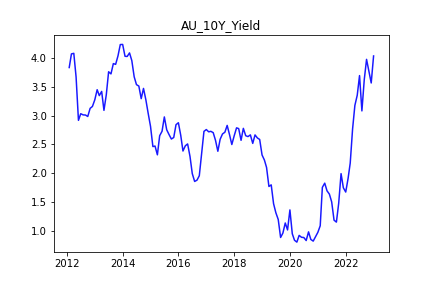

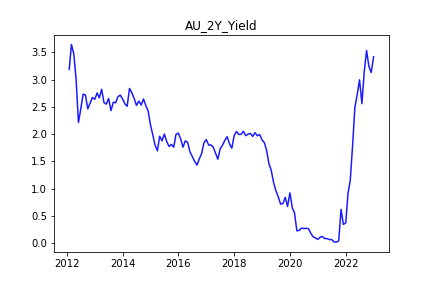

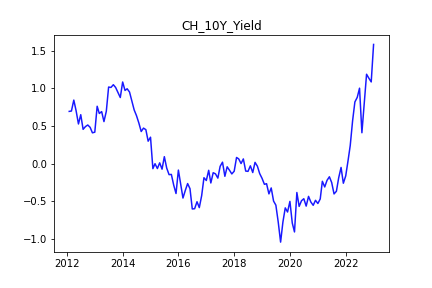

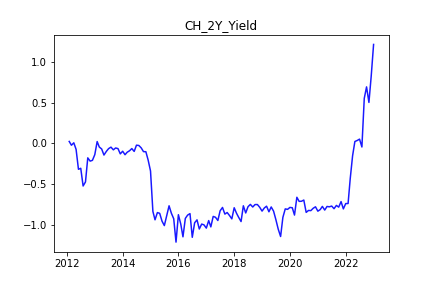

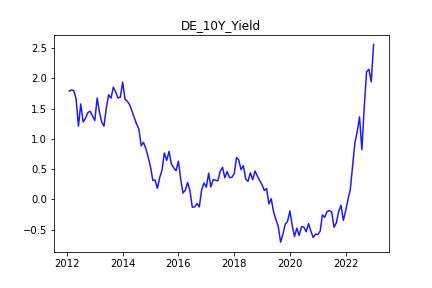

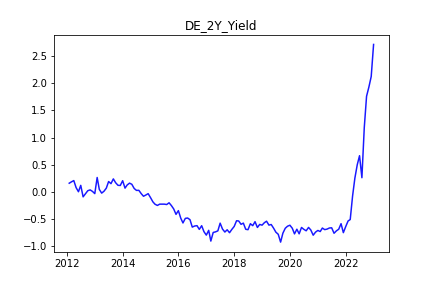

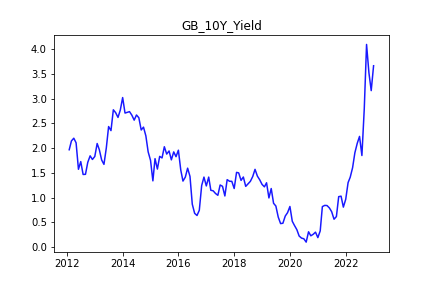

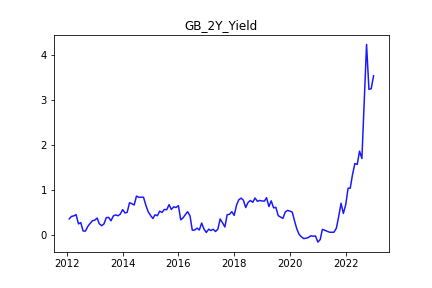

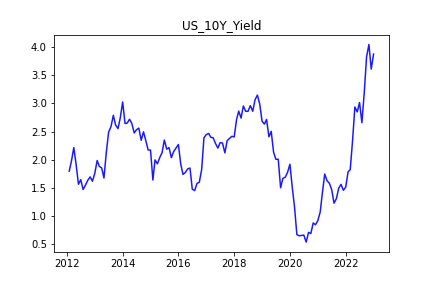

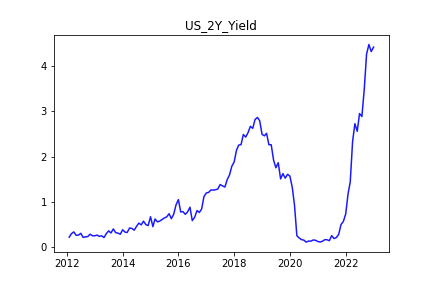

In [24]:
# Plot yield data and save individual time series
for col in yield_api.iteritems(): 
    fig, ax = plt.subplots()
    indicator=yield_api[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    plt.savefig('Charts\Yield\Plot_'+col[0]+'.png')
    plt.close()
    
     # Display the saved chart
    display(Image(filename='Charts/Yield/Plot_' + col[0] + '.png'))

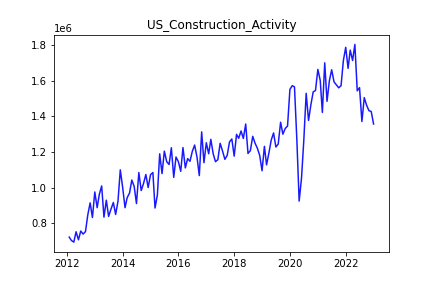

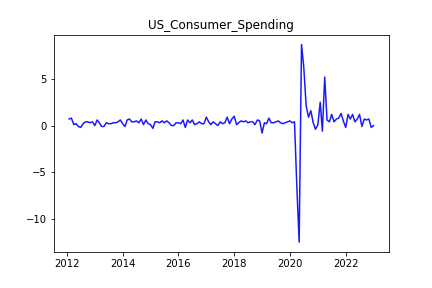

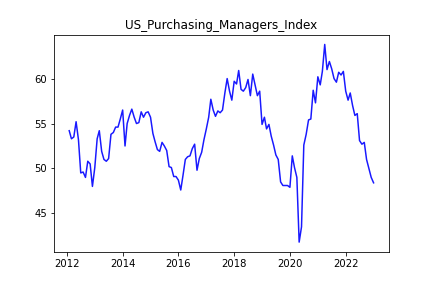

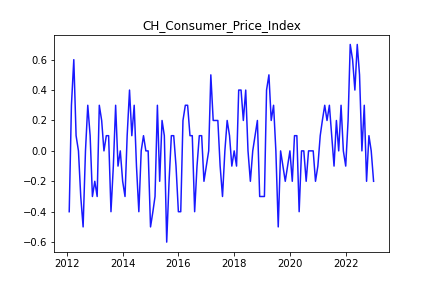

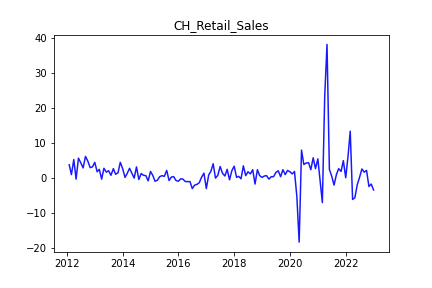

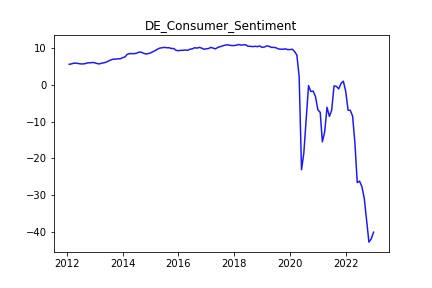

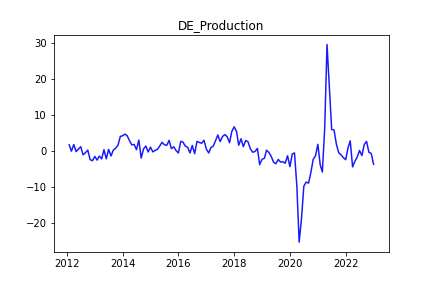

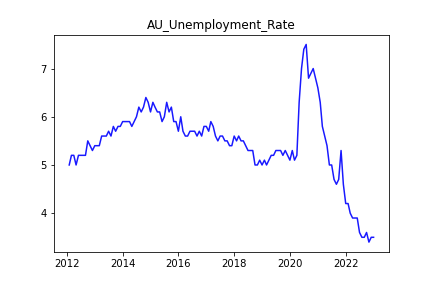

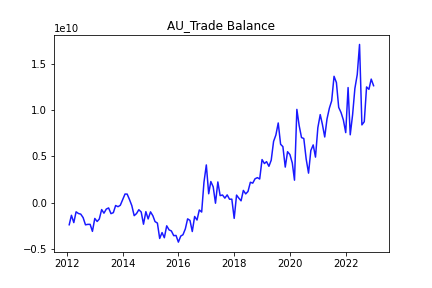

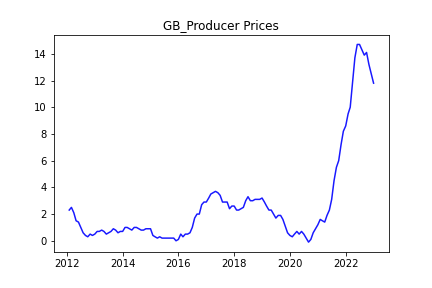

In [25]:
# plot macro dataand save individual time series
for col in macro_api.iteritems(): 
    fig, ax = plt.subplots()
    indicator=macro_api[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    plt.savefig('Charts\Macro\Plot_'+col[0]+'.png')
    plt.close()
    
    # Display the saved chart
    display(Image(filename='Charts/Macro/Plot_' + col[0] + '.png'))

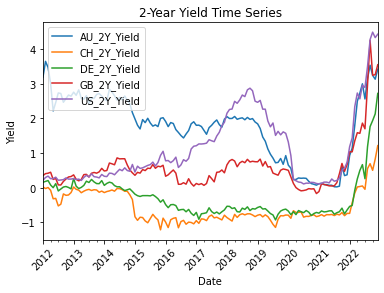

<Figure size 720x432 with 0 Axes>

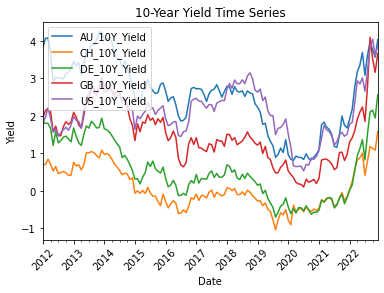

In [26]:
# Plotting 2-year yield
yield_api[['AU_2Y_Yield', 'CH_2Y_Yield', 'DE_2Y_Yield', 'GB_2Y_Yield', 'US_2Y_Yield']].plot()
plt.title('2-Year Yield Time Series')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.savefig('Charts\Yield_2_'+col[0]+'.png')
plt.show()

# Plotting 10-year yield
plt.figure(figsize=(10, 6))
yield_api[['AU_10Y_Yield', 'CH_10Y_Yield', 'DE_10Y_Yield', 'GB_10Y_Yield', 'US_10Y_Yield']].plot()
plt.title('10-Year Yield Time Series')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.savefig('Charts\Yield_10_'+col[0]+'.png')
plt.show()

## 2.5 Normality Test

### Histogram

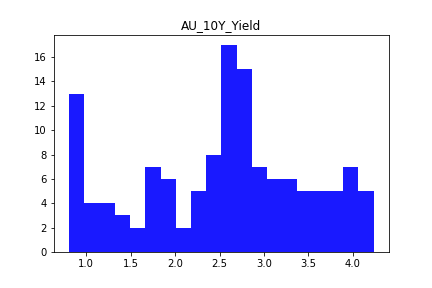

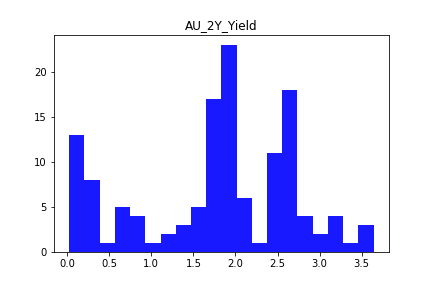

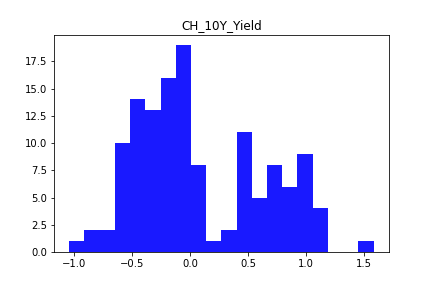

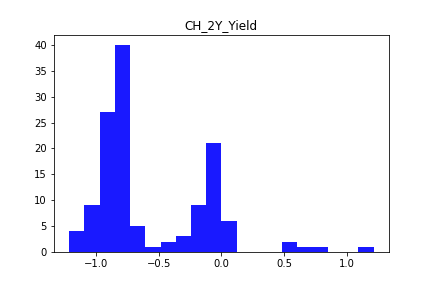

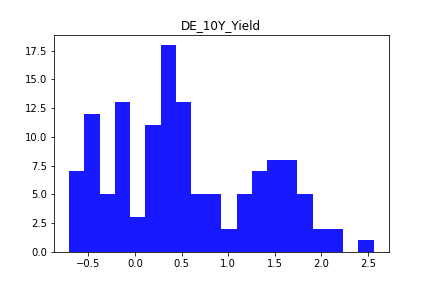

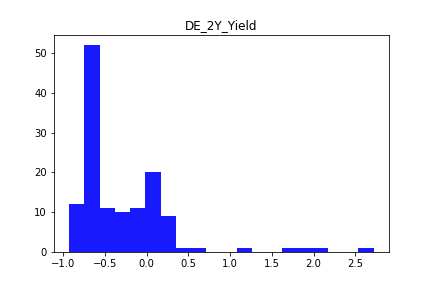

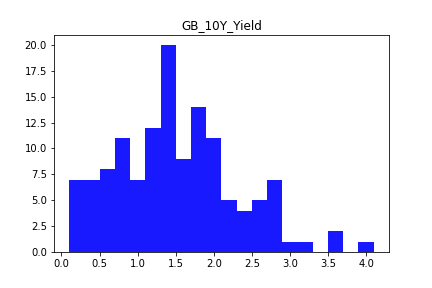

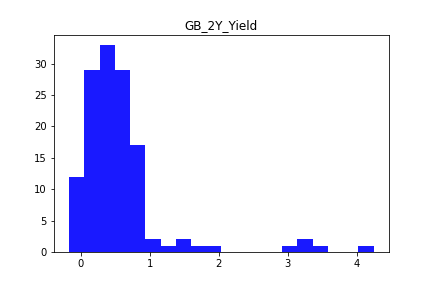

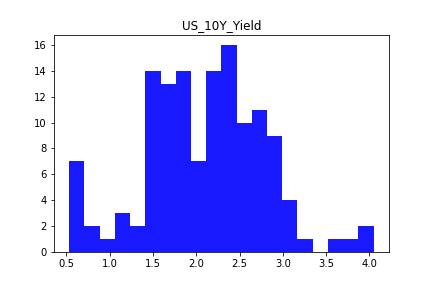

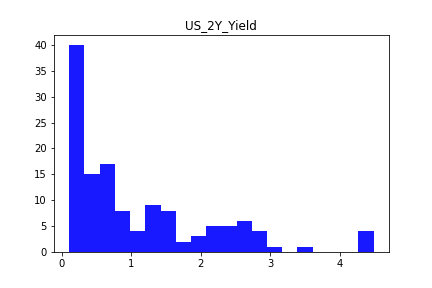

In [27]:
#Histograms for each yield time series  
for col in yield_api.iteritems(): 
    fig, ax = plt.subplots()
    indicator=yield_api[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    plt.savefig('Charts\Yield\Hist_'+col[0]+'.png')
    plt.close()
    display(Image(filename='Charts/Yield/Hist_' + col[0] + '.png'))

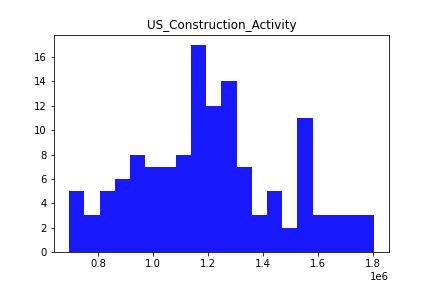

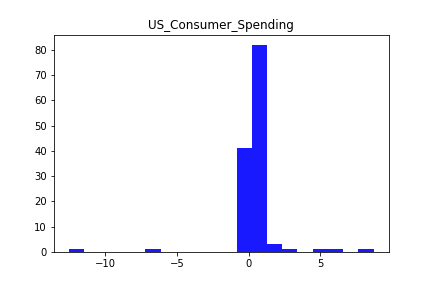

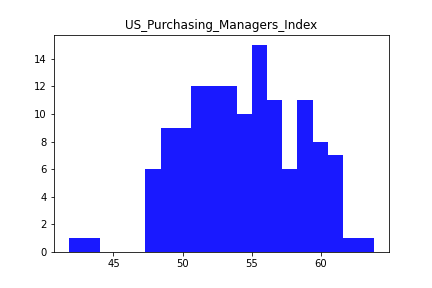

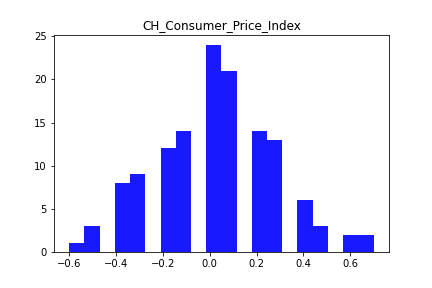

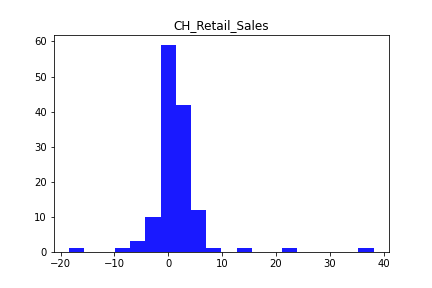

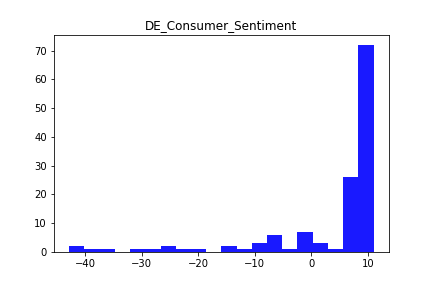

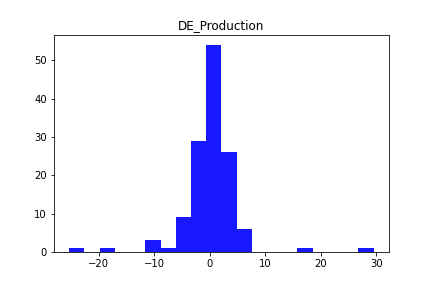

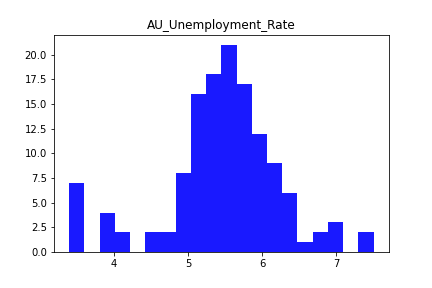

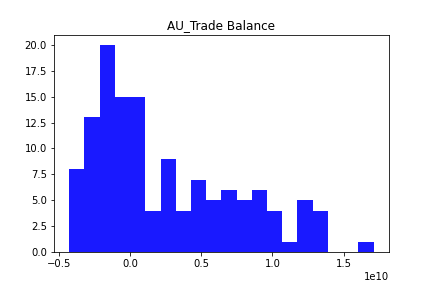

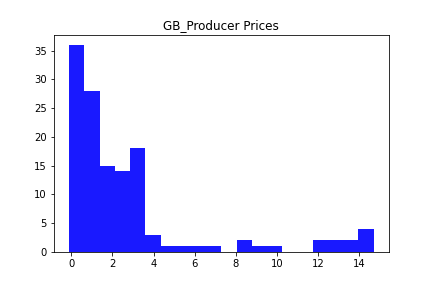

In [28]:
#Histograms for each individual series  

for col in macro_api.iteritems(): 
    fig, ax = plt.subplots()
    indicator=macro_api[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    plt.savefig('Charts\Macro\Hist_'+col[0]+'.png')
    plt.close()
    display(Image(filename='Charts/Macro/Hist_' + col[0] + '.png'))

### Q-Q Plot

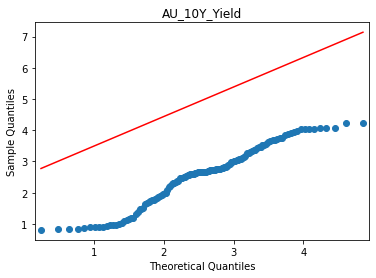

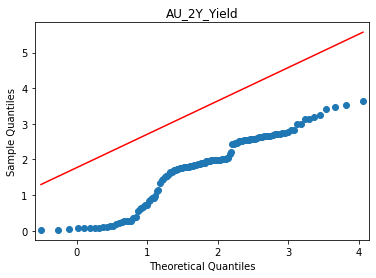

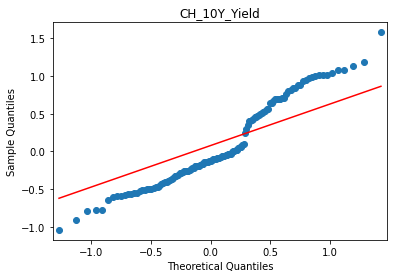

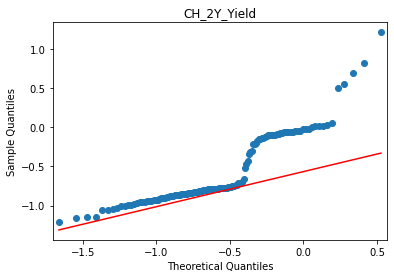

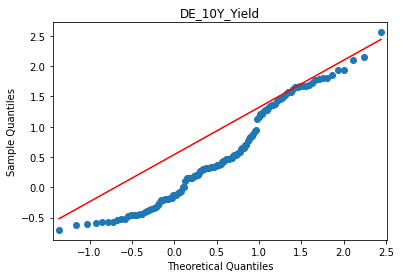

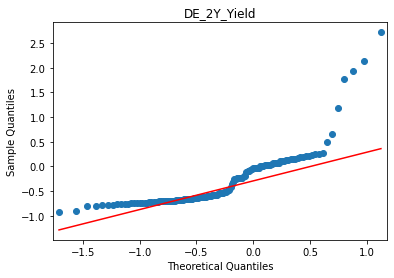

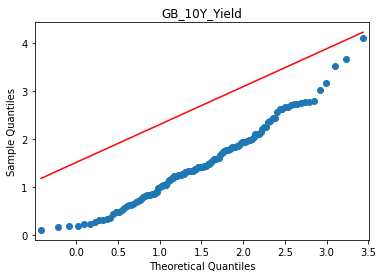

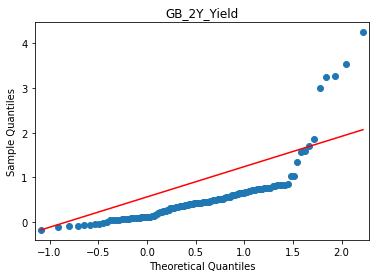

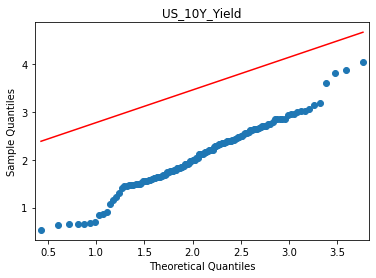

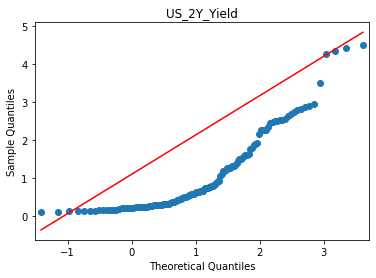

In [29]:
for col in yield_api.iteritems():
    data = yield_api[col[0]]
    mean = statistics.mean(data)
    st_dev = statistics.stdev(data)
    obs_count = len(data)
    sm.qqplot(data, loc=mean, scale=st_dev, line='s')
    plt.title(col[0])
    plt.show()

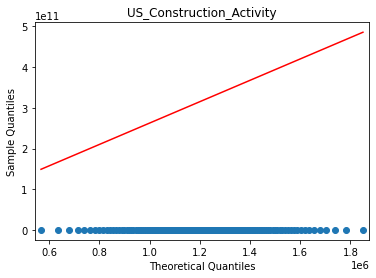

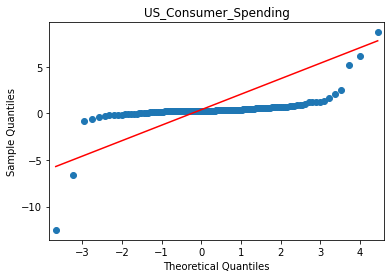

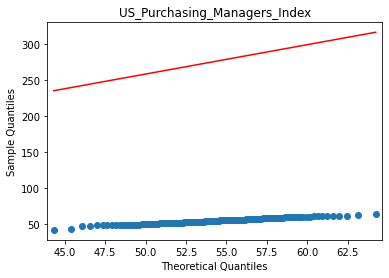

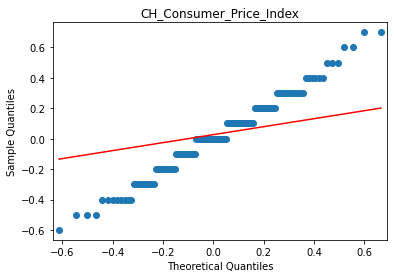

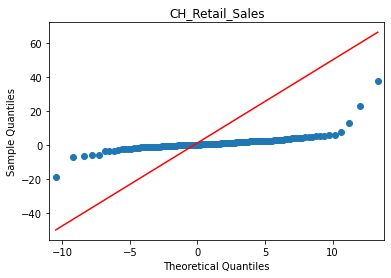

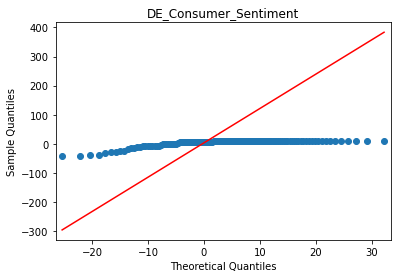

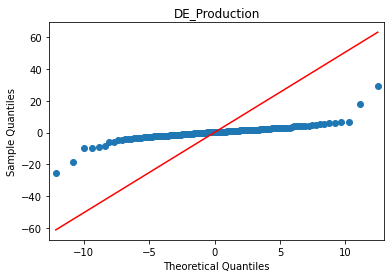

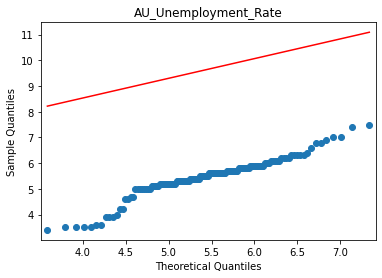

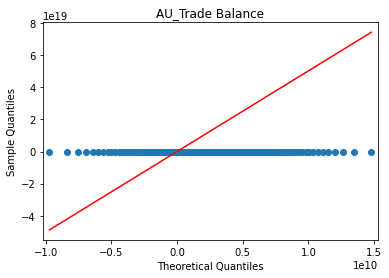

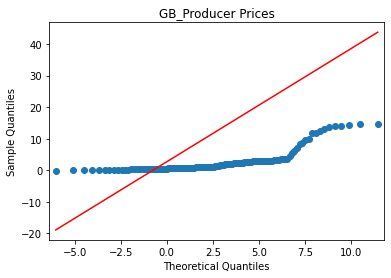

In [30]:
for col in macro_api.iteritems():
    data = macro_api[col[0]]
    mean = statistics.mean(data)
    st_dev = statistics.stdev(data)
    obs_count = len(data)
    sm.qqplot(data, loc=mean, scale=st_dev, line='s')
    plt.title(col[0])
    plt.show()

### Boxplot

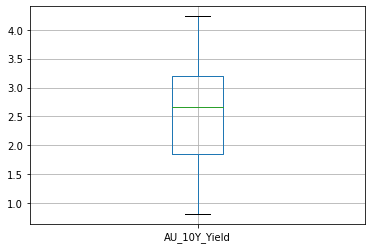

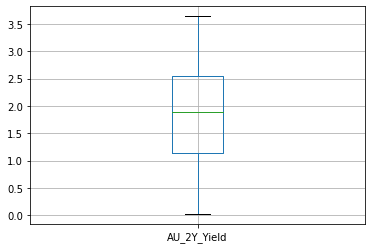

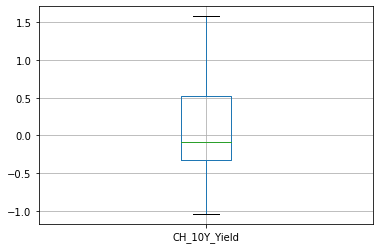

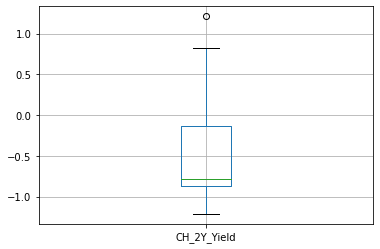

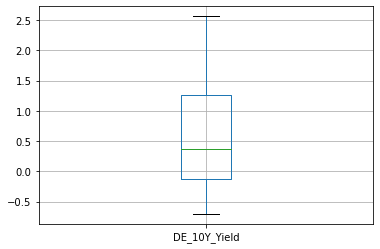

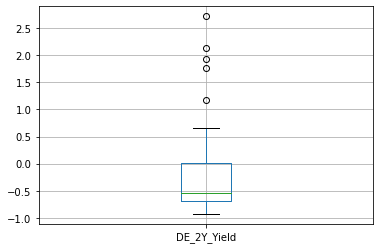

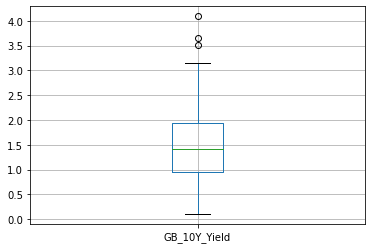

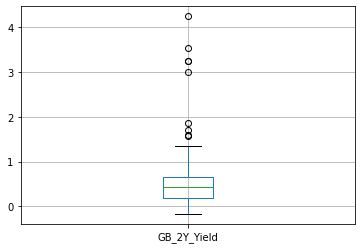

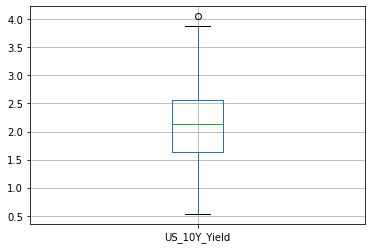

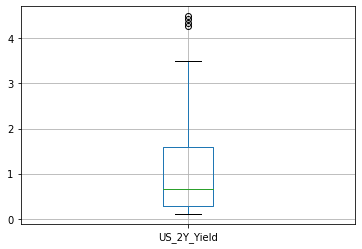

In [31]:
for col in yield_api.columns:
    boxplot1 = yield_api.boxplot(column=[col])
    plt.show()

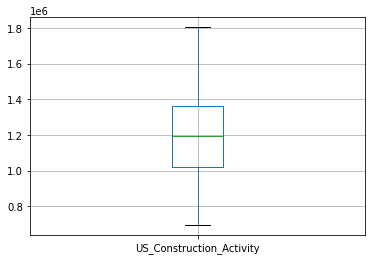

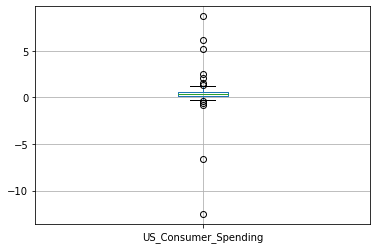

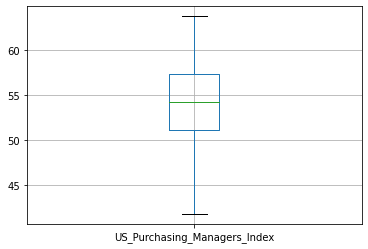

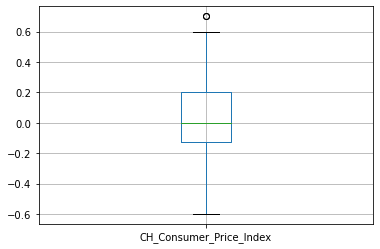

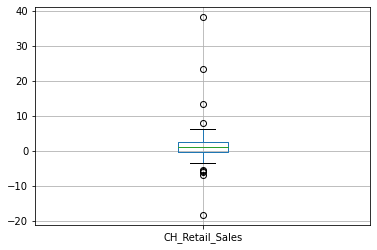

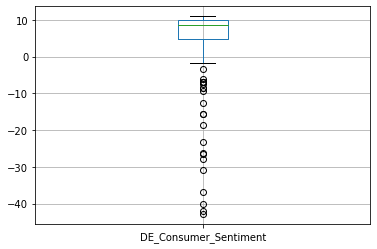

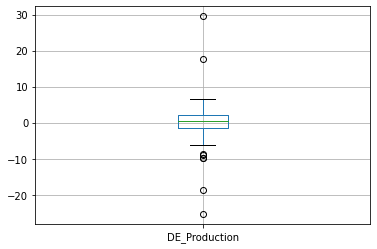

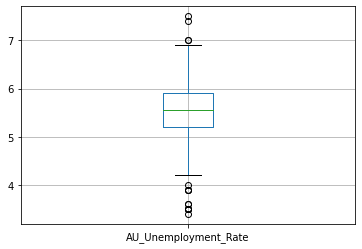

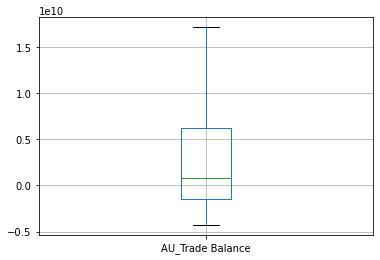

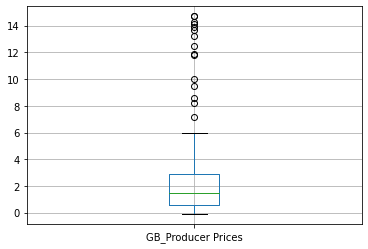

In [32]:
for col in macro_api.columns:
    boxplot1 = macro_api.boxplot(column=[col])
    plt.show()

### Shapiro-Wilk Normality Test

In [33]:
alpha = 0.05

for col in yield_api.columns:
    stat, p=stats.shapiro(yield_api[col])
    print(col)
    print("p-value for Shapiro-Wilk:")
    print(p)
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')

AU_10Y_Yield
p-value for Shapiro-Wilk:
0.0002637123689055443
Sample does not look Gaussian (reject H0)

AU_2Y_Yield
p-value for Shapiro-Wilk:
1.0265320270264056e-05
Sample does not look Gaussian (reject H0)

CH_10Y_Yield
p-value for Shapiro-Wilk:
6.962499901419505e-05
Sample does not look Gaussian (reject H0)

CH_2Y_Yield
p-value for Shapiro-Wilk:
1.7179541123013564e-10
Sample does not look Gaussian (reject H0)

DE_10Y_Yield
p-value for Shapiro-Wilk:
0.00011024122795788571
Sample does not look Gaussian (reject H0)

DE_2Y_Yield
p-value for Shapiro-Wilk:
4.9300502374081956e-14
Sample does not look Gaussian (reject H0)

GB_10Y_Yield
p-value for Shapiro-Wilk:
0.016852160915732384
Sample does not look Gaussian (reject H0)

GB_2Y_Yield
p-value for Shapiro-Wilk:
2.961541379884906e-16
Sample does not look Gaussian (reject H0)

US_10Y_Yield
p-value for Shapiro-Wilk:
0.13497580587863922
Sample looks Gaussian (fail to reject H0)

US_2Y_Yield
p-value for Shapiro-Wilk:
5.928982999003907e-11
Sample 

In [34]:
alpha = 0.05

for col in macro_api.columns:
    stat, p=stats.shapiro(macro_api[col])
    print(col)
    print("p-value for Shapiro-Wilk:")
    print(p)
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')

US_Construction_Activity
p-value for Shapiro-Wilk:
0.05802815034985542
Sample looks Gaussian (fail to reject H0)

US_Consumer_Spending
p-value for Shapiro-Wilk:
1.7702408278716383e-20
Sample does not look Gaussian (reject H0)

US_Purchasing_Managers_Index
p-value for Shapiro-Wilk:
0.15016953647136688
Sample looks Gaussian (fail to reject H0)

CH_Consumer_Price_Index
p-value for Shapiro-Wilk:
0.09015794098377228
Sample looks Gaussian (fail to reject H0)

CH_Retail_Sales
p-value for Shapiro-Wilk:
1.49837918142689e-16
Sample does not look Gaussian (reject H0)

DE_Consumer_Sentiment
p-value for Shapiro-Wilk:
1.594831087828533e-16
Sample does not look Gaussian (reject H0)

DE_Production
p-value for Shapiro-Wilk:
2.9868251968934167e-13
Sample does not look Gaussian (reject H0)

AU_Unemployment_Rate
p-value for Shapiro-Wilk:
8.05054423835827e-06
Sample does not look Gaussian (reject H0)

AU_Trade Balance
p-value for Shapiro-Wilk:
2.1240336423034023e-07
Sample does not look Gaussian (reject H0

# 3. Save Data to SQLite database
No differences were found between yield's Excel and API data. Therefore, the data is uploaded into the prepared SQLite database. 

In [35]:
# connect to SQLite database
conn = sqlite3.connect('Group H_Assignment.db')

# create cursor object
c = conn.cursor()

In [36]:
# save data to SQLite
yield_api.to_sql('Yield', conn, if_exists='replace', index=True)
macro_api.to_sql('Macro', conn, if_exists='replace', index=True)

132

In [37]:
# close the database connection
c.close()

# 4. Analysis


In [38]:
import pandas as pd
import sqlite3
from scipy import stats
import statsmodels.api as sm
from itertools import combinations
from statsmodels.tsa.stattools import adfuller
import statsmodels.stats.outliers_influence as oi
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

## 4.1 Prepare data 
We extract the data from the SQLite database again and prepare it for the subsequent tests.

In [39]:
# Connect to the Database
conn = sqlite3.connect('Group H_Assignment.db')

# Define Cursor
c = conn.cursor()

# Get Data
yield_query = "SELECT * FROM Yield"
macro_query = "SELECT * FROM Macro"
yield_df = pd.read_sql(yield_query, conn, index_col='Date')
macro_df = pd.read_sql(macro_query, conn, index_col='Date')

# convert the type to float
macro_df = macro_df.astype(float)
yield_df = yield_df.astype(float)

## 4.2 Stationarity test
We do a Dickey-Fuller test to see if the variables are stationary or not. The collected data on yield data is stored in a new table in the database.

In [40]:
macro_afd = [] # create empty list for results

# loop to execute dickey-fuller test on variables 
for col in macro_df.columns:
    if col == 'Date':
        continue
    macro_adf_test = adfuller(macro_df[col]) # perform dickey-fuller test
    macro_afd_p_value = macro_adf_test[1] # extract p-value and add to test result
    macro_is_stationary = "Stationary" if macro_afd_p_value < 0.05 else "Not Stationary" # asses if stationary and return text
    macro_afd.append((col, macro_afd_p_value, macro_is_stationary)) # merge the different results 
    
macro_afd = pd.DataFrame(macro_afd, columns=['indicator', 'afd_p_value', 'is_stationary']) # convert into dataframe and add column names
macro_afd.set_index('indicator', inplace=True) # set the index
macro_afd

yield_afd = []
for col in yield_df.columns:
    if col == 'Date':
        continue
    adf_test = adfuller(yield_df[col]) # perform dickey-fuller test
    afd_p_value = adf_test[1] # extract p-value and add to test result
    is_stationary = "Stationary" if afd_p_value < 0.05 else "Not Stationary" # asses if stationary and return text
    yield_afd.append((col, afd_p_value, is_stationary)) # merge the different results 

yield_afd = pd.DataFrame(yield_afd, columns=['instrument', 'afd_p_value', 'is_stationary']) # convert into dataframe and add column names
yield_afd.set_index('instrument', inplace=True) # set the index
yield_afd.to_sql('Stationarity_Test', conn, if_exists='replace') # save result to SQLite Database as requested

print(macro_afd)
print(yield_afd)

                               afd_p_value   is_stationary
indicator                                                 
US_Construction_Activity      3.613622e-01  Not Stationary
US_Consumer_Spending          3.481278e-18      Stationary
US_Purchasing_Managers_Index  3.086085e-05      Stationary
CH_Consumer_Price_Index       7.018351e-01  Not Stationary
CH_Retail_Sales               1.860799e-02      Stationary
DE_Consumer_Sentiment         9.920378e-01  Not Stationary
DE_Production                 7.463709e-02  Not Stationary
AU_Unemployment_Rate          7.530500e-01  Not Stationary
AU_Trade Balance              9.782574e-01  Not Stationary
GB_Producer Prices            2.884068e-01  Not Stationary
              afd_p_value   is_stationary
instrument                               
AU_10Y_Yield     0.478771  Not Stationary
AU_2Y_Yield      0.635970  Not Stationary
CH_10Y_Yield     0.588834  Not Stationary
CH_2Y_Yield      0.964239  Not Stationary
DE_10Y_Yield     0.836189  Not Stationar

Some of the macro data und the yield data is not stationary. Because all Data in a time series regression has to be stationary we perform differencing to make the data stationary.

In [41]:
# Make yield_df stationary
yield_df_diff = yield_df.diff().dropna()

# Make macro_df stationary
non_stationary_cols = macro_afd[macro_afd['is_stationary'] == 'Not Stationary'].index # Create list with non stationary columns

macro_df_diff = macro_df.copy()  # Create a copy of the original yield DataFrame

for col in non_stationary_cols:
    macro_df_diff[col] = macro_df[col].diff() # differencing all columns with non stationary data

macro_df_diff.dropna(inplace=True)  # Drop rows with NaN values

In [42]:
macro_diff_afd = []
for macro_col in macro_df_diff.columns:
    if macro_col == 'Date':
        continue
    macro_adf_test = adfuller(macro_df_diff[macro_col]) # perform dickey-fuller test
    macro_afd_p_value = macro_adf_test[1] # extract p-value and add to test result
    macro_is_stationary = "Stationary" if macro_afd_p_value < 0.05 else "Not Stationary" # asses if stationary and return text
    macro_diff_afd.append((macro_col, macro_afd_p_value, macro_is_stationary)) # merge the different results 

macro_diff_afd = pd.DataFrame(macro_diff_afd, columns=['indicator', 'afd_p_value', 'is_stationary']) # convert into dataframe and add column names
macro_diff_afd.set_index('indicator', inplace=True) # set the index


yield_diff_afd = []
for col in yield_df_diff.columns:
    if col == 'Date':
        continue
    adf_test = adfuller(yield_df_diff[col]) # perform dickey-fuller test
    afd_p_value = adf_test[1] # extract p-value and add to test result
    is_stationary = "Stationary" if afd_p_value < 0.05 else "Not Stationary" # asses if stationary and return text
    yield_diff_afd.append((col, afd_p_value, is_stationary)) # merge the different results 

yield_diff_afd = pd.DataFrame(yield_diff_afd, columns=['indicator', 'afd_p_value', 'is_stationary']) # convert into dataframe and add column names
yield_diff_afd.set_index('indicator', inplace=True) # set the index

print(macro_diff_afd)
print(yield_diff_afd)

                               afd_p_value is_stationary
indicator                                               
US_Construction_Activity      5.101885e-08    Stationary
US_Consumer_Spending          4.546663e-18    Stationary
US_Purchasing_Managers_Index  4.055869e-05    Stationary
CH_Consumer_Price_Index       1.116575e-07    Stationary
CH_Retail_Sales               2.424241e-02    Stationary
DE_Consumer_Sentiment         2.582911e-14    Stationary
DE_Production                 4.911050e-06    Stationary
AU_Unemployment_Rate          4.592219e-17    Stationary
AU_Trade Balance              7.432868e-03    Stationary
GB_Producer Prices            8.941130e-06    Stationary
               afd_p_value   is_stationary
indicator                                 
AU_10Y_Yield  9.317733e-17      Stationary
AU_2Y_Yield   7.249323e-07      Stationary
CH_10Y_Yield  2.377817e-01  Not Stationary
CH_2Y_Yield   3.869620e-02      Stationary
DE_10Y_Yield  2.358379e-21      Stationary
DE_2Y_Yield   1

Because some yield data is still not stationary we difference it again.

In [43]:
# Check if value is stationary and if not dif
non_stationary_cols = yield_diff_afd[yield_diff_afd['is_stationary'] == 'Not Stationary'].index

yield_df_diff_2 = yield_df_diff.copy()  # Create a copy of the original yield DataFrame

for col in non_stationary_cols:
    yield_df_diff_2[col] = yield_df_diff[col].diff()  # differencing all columns with non stationary data

yield_df_diff_2.dropna(inplace=True)  # Drop rows with NaN values

macro_df_diff = macro_df_diff.iloc[1:] # Drop one row of macro data

In [44]:
# check if the yield data is now stationary
yield_diff_2_afd = []
for col in yield_df_diff_2.columns:
    if col == 'Date':
        continue
    adf_test = adfuller(yield_df_diff_2[col]) # perform dickey-fuller test
    afd_p_value = adf_test[1] # extract p-value and add to test result
    is_stationary = "Stationary" if afd_p_value < 0.05 else "Not Stationary" # asses if stationary and return text
    yield_diff_2_afd.append((col, afd_p_value, is_stationary)) # merge the different results 

yield_diff_2_afd = pd.DataFrame(yield_diff_2_afd, columns=['indicator', 'afd_p_value', 'is_stationary']) # convert into dataframe and add column names
yield_diff_2_afd.set_index('indicator', inplace=True) # set the index

print(yield_diff_2_afd)

               afd_p_value is_stationary
indicator                               
AU_10Y_Yield  1.559971e-16    Stationary
AU_2Y_Yield   4.858856e-08    Stationary
CH_10Y_Yield  5.407362e-14    Stationary
CH_2Y_Yield   2.021253e-02    Stationary
DE_10Y_Yield  2.018808e-03    Stationary
DE_2Y_Yield   2.837846e-05    Stationary
GB_10Y_Yield  4.835843e-16    Stationary
GB_2Y_Yield   3.097677e-07    Stationary
US_10Y_Yield  1.846608e-18    Stationary
US_2Y_Yield   3.739405e-07    Stationary


## 4.3 Multivariate OLS Regression
We run a regression for each dependent variable with each combination of independent variables. In this way we arrive at 10'230 different regressions of which the results are also stored in the database in a new table. To do this, we first create a list of all possible combinations of macroeconomic indicators that we have in our dataframe. Then we create a function with which we can measure the variance inflation factor. Using a loop, we generate regressions and collect the key results. To test for autocorrelation we use the durbin watson test, for heteroskedasticity we use the Jarque Bera test and for multicollinearity we use the VIF formula we defined. Since a VIF is calculated for each independent variable of each regression, the loop stores only the highest value and counts how many values above five there are. The data is then stored in a new table in the database.

In [45]:
# Create a list with all possbible combinations of independent varibles.
independent_variables = list()

for n in range(1, len(macro_df_diff) + 1):
    independent_variables += list(combinations(macro_df_diff, n))

In [46]:
# Create a list with all possbible combinations of independent varibles.
independent_variables = list()

for n in range(1, len(macro_df_diff) + 1):
    independent_variables.extend(list(combinations(macro_df_diff, n)))

In [47]:
# create own function (calculate_vif)to check VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.iloc[1:] 
    max_vif = vif["VIF"].max() # save the highest VIF Value 
    num_vif_over_5 = len(vif[vif["VIF"] > 5]) # count the nuber of VIF Values over 5
    return max_vif, num_vif_over_5

In [48]:
regression_results = []
dependent_variables = yield_df_diff_2.columns[:]

for combination in itertools.product(dependent_variables, independent_variables): # creat list of all possible regessions
    instrument = combination[0] 
    independent_vars = combination[1]

    y = yield_df_diff_2[instrument]
    X = macro_df_diff[list(independent_vars)]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()

    # Perform the Durbin Watson test to check for Autocorrelation
    dw = sm.stats.durbin_watson(results.resid)

    # Perform the Jarque-Bera test to check if residuals are normally distributed
    jb_test = sms.jarque_bera(results.resid)
    
    # Perform the Breusch-Pagan test to check for heteroskedasticity
    bp_test = sms.het_breuschpagan(results.resid, results.model.exog)

    # Calculate VIF for independent variables
    max_vif, num_vif_over_5 = calculate_vif(X)

    # save all the results
    regression_results.append({"Instrument": instrument,
                               "Indicators": independent_vars,
                               "R-squared": results.rsquared,
                               "Adj_R-squared": results.rsquared_adj,
                               "F-statistic": results.fvalue,
                               "Prob_(F-statistic)": results.f_pvalue,
                               "Durbin_Watson": dw,
                               "Jarque_Bera": jb_test[0],
                               "Jarque_Bera_p-value": jb_test[1],
                               "Lagrange_Multiplier_statistic": bp_test[0],
                               "Breusch_Pagan_p-value": bp_test[1],
                               "Max_VIF":max_vif,
                               "Num_VIF_over_5":num_vif_over_5})

In [49]:
# Drop the existing table if it exists
c.execute('DROP TABLE IF EXISTS Regression_Results')

# Create a new table for the regression results
c.execute('''CREATE TABLE Regression_Results (
                Instrument TEXT,
                Indicators TEXT,
                R_squared REAL,
                Adj_R_squared REAL,
                F_statistic REAL,
                Prob_F_statistic REAL,
                Durbin_Watson REAL,
                Jarque_Bera REAL,
                Jarque_Bera_p_value REAL,
                Lagrange_Multiplier_statistic REAL,
                Breusch_Pagan_p_value REAL,
                Max_VIF REAL,
                Num_VIF_over_5 INTEGER
            )''')

# Insert the regression results into the table
for result in regression_results:
    c.execute('''INSERT INTO Regression_Results (
                    Instrument,
                    Indicators,
                    R_squared,
                    Adj_R_squared,
                    F_statistic,
                    Prob_F_statistic,
                    Durbin_Watson,
                    Jarque_Bera,
                    Jarque_Bera_p_value,
                    Lagrange_Multiplier_statistic,
                    Breusch_Pagan_p_value,
                    Max_VIF,
                    Num_VIF_over_5
                )
                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''',
              (result["Instrument"],
               ', '.join(result["Indicators"]),
               result["R-squared"],
               result["Adj_R-squared"],
               result["F-statistic"],
               result["Prob_(F-statistic)"],
               result["Durbin_Watson"],
               result["Jarque_Bera"],
               result["Jarque_Bera_p-value"],
               result["Lagrange_Multiplier_statistic"],
               result["Breusch_Pagan_p-value"],
               result["Max_VIF"],
               result["Num_VIF_over_5"]))

# Commit the changes and close the connection
conn.commit()
conn.close()

## 4.4 Model Results
The results are again retrieved from the database for visualisation and analysis.

In [50]:
# Connect to the Database
conn = sqlite3.connect('Group H_Assignment.db')

# Define Cursor
c = conn.cursor()

# Get Data
regression_results_query = "SELECT * FROM regression_results"
results_df = pd.read_sql(regression_results_query, conn)

#### High Explanatory Power
The regressions with the highest adjusted r-squared are retrieved from the data. The histogram shows how the adjusted r-squared results are distributed and the boxplot shows how this is distributed among the individual instruments.

In [51]:
# Sort the DataFrame by adjusted R-squared in descending order
adj_r_squared_df = results_df.sort_values(by='Adj_R_squared', ascending=False)

# Print the top models with highest adjusted R-squared values
print("High Explanatory Power:")
adj_r_squared_df.head()

High Explanatory Power:


,Instrument,Indicators,R_squared,Adj_R_squared,F_statistic,Prob_F_statistic,Durbin_Watson,Jarque_Bera,Jarque_Bera_p_value,Lagrange_Multiplier_statistic,Breusch_Pagan_p_value,Max_VIF,Num_VIF_over_5
1276,AU_2Y_Yield,"US_Construction_Activity, DE_Consumer_Sentimen...",0.173233,0.146777,6.547834,0.000081,1.814499,26.009318,2.249823e-06,1.247464,0.870224,1.105954,0
1532,AU_2Y_Yield,"US_Construction_Activity, DE_Consumer_Sentimen...",0.179025,0.145921,5.407976,0.000156,1.784162,24.766120,4.188951e-06,1.828826,0.872287,1.106268,0
1112,AU_2Y_Yield,"US_Construction_Activity, AU_Unemployment_Rate...",0.165118,0.145240,8.306526,0.000044,1.761197,29.907715,3.203481e-07,0.570891,0.903063,1.007397,0
1281,AU_2Y_Yield,"US_Construction_Activity, AU_Unemployment_Rate...",0.171142,0.144618,6.452461,0.000094,1.732902,27.963719,8.467509e-07,1.950000,0.744955,1.067004,0
1107,AU_2Y_Yield,"US_Construction_Activity, DE_Consumer_Sentimen...",0.164378,0.144482,8.261943,0.000046,1.876950,22.123453,1.570193e-05,1.102126,0.776561,1.023005,0


In [52]:
# group by Instrument and select the highest Adj_R2 
best_results_df = results_df.groupby('Instrument')['Adj_R_squared'].idxmax()
best_results_df = results_df.loc[best_results_df].reset_index(drop=True)
best_results_df.to_csv('Explanatory Power.csv')

best_results_df

,Instrument,Indicators,R_squared,Adj_R_squared,F_statistic,Prob_F_statistic,Durbin_Watson,Jarque_Bera,Jarque_Bera_p_value,Lagrange_Multiplier_statistic,Breusch_Pagan_p_value,Max_VIF,Num_VIF_over_5
0,AU_10Y_Yield,"DE_Consumer_Sentiment, GB_Producer Prices",0.063575,0.048828,4.311109,0.015436,1.829692,1.961423,3.750441e-01,0.858118,0.651122,1.016602,0
1,AU_2Y_Yield,"US_Construction_Activity, DE_Consumer_Sentimen...",0.173233,0.146777,6.547834,0.000081,1.814499,26.009318,2.249823e-06,1.247464,0.870224,1.105954,0
2,CH_10Y_Yield,"US_Consumer_Spending, US_Purchasing_Managers_I...",0.073690,0.044048,2.486002,0.046870,2.827027,10.434302,5.422756e-03,5.702076,0.222530,1.180625,0
3,CH_2Y_Yield,GB_Producer Prices,0.017435,0.009759,2.271304,0.134253,1.917867,133.978598,8.070811e-30,4.519962,0.033502,1.000000,0
4,DE_10Y_Yield,"DE_Consumer_Sentiment, AU_Unemployment_Rate, A...",0.088260,0.066552,4.065748,0.008532,2.095467,15.396941,4.535203e-04,1.570515,0.666094,1.077455,0
5,DE_2Y_Yield,AU_Trade Balance,0.007058,-0.000699,0.909882,0.341944,2.912778,1460.024221,0.000000e+00,0.160207,0.688966,1.000000,0
6,GB_10Y_Yield,"DE_Consumer_Sentiment, AU_Unemployment_Rate, A...",0.045237,0.022504,1.989963,0.118843,1.997187,99.375075,2.636189e-22,5.863531,0.118442,1.077455,0
7,GB_2Y_Yield,AU_Trade Balance,0.011032,0.003306,1.427838,0.234327,2.690323,3563.408906,0.000000e+00,0.013433,0.907730,1.000000,0
8,US_10Y_Yield,"US_Consumer_Spending, US_Purchasing_Managers_I...",0.075802,0.046228,2.563102,0.041595,1.966153,0.037639,9.813565e-01,17.675499,0.001428,1.117201,0
9,US_2Y_Yield,"CH_Consumer_Price_Index, AU_Trade Balance",0.043852,0.028794,2.912288,0.057990,2.784424,9.267781,9.716883e-03,2.567754,0.276961,1.002071,0


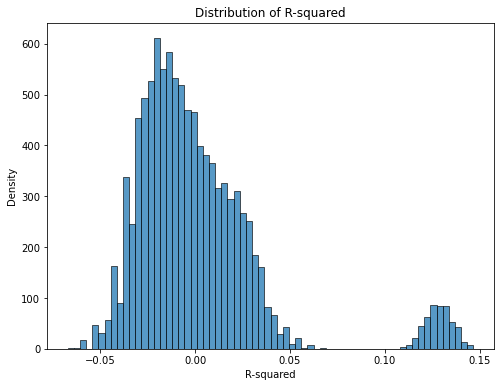

In [53]:
# Create a distribution plot of R-squared values
plt.figure(figsize=(8, 6))
sns.histplot(results_df['Adj_R_squared'])
plt.xlabel('R-squared')
plt.ylabel('Density')
plt.title('Distribution of R-squared')
plt.savefig('Charts\R-squared_'+col[0]+'.png')
plt.show()

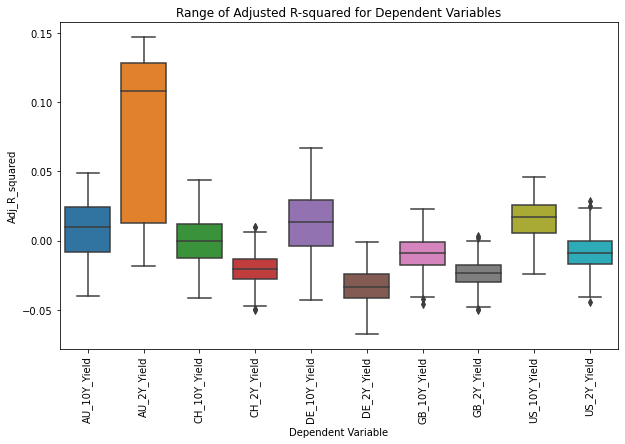

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=results_df['Instrument'], y=results_df['Adj_R_squared'])
plt.xlabel('Dependent Variable')
plt.ylabel('Adj_R_squared')
plt.title('Range of Adjusted R-squared for Dependent Variables')
plt.xticks(rotation=90)
plt.show()

#### Autocorelation
The Durbin-Watson test is used to check whether autocorrelation is present in the residuals of a regression. The value can go from 0-4, where 2 means that no autocorrelation is present. The closer the value is to 0, the higher the probability that strong negative autocorrelation is present, whereas a value of four indicates strong positive autocorrelation. We have defined a threshold of 1.5 to 2.5 in our diagrams, which indicates weak autocorrelation and marked it with red lines.

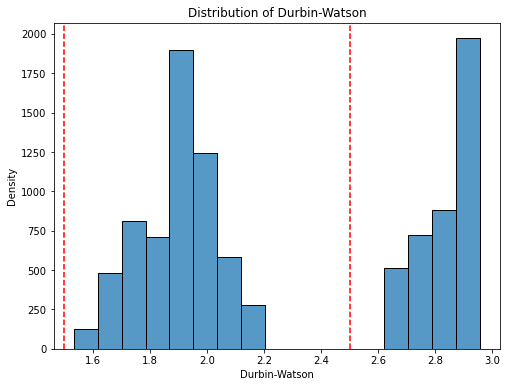

In [55]:
# Create a distribution plot of durbin-watson test results
plt.figure(figsize=(8, 6))
sns.histplot(results_df['Durbin_Watson'])
plt.xlabel('Durbin-Watson')
plt.ylabel('Density')
plt.axvline(x=1.5, color='red', linestyle='--')
plt.axvline(x=2.5, color='red', linestyle='--')
plt.title('Distribution of Durbin-Watson')
plt.show()

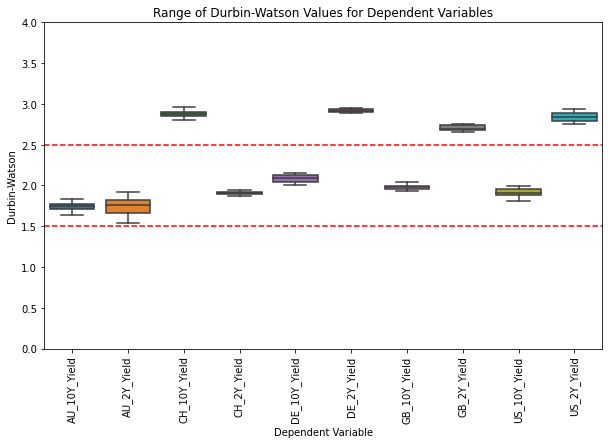

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=results_df['Instrument'], y=results_df['Durbin_Watson'])
plt.xlabel('Dependent Variable')
plt.ylabel('Durbin-Watson')
plt.title('Range of Durbin-Watson Values for Dependent Variables')
plt.axhline(y=1.5, color='red', linestyle='--')
plt.axhline(y=2.5, color='red', linestyle='--')
plt.ylim(0, 4)
plt.xticks(rotation=90)
plt.show()

#### Heteroskedasticity
The Breusch-Pagan p-value examines the relationship between the residuals and the independent variables to determine heteroskedasticity. We have taken an alpha of 0.05 for our test, which means that if the p-value is below this threshold, the null hypothesis of no hetererskedasticity must be rejected. In both diagrams we have symbolised the alpha with a red line.

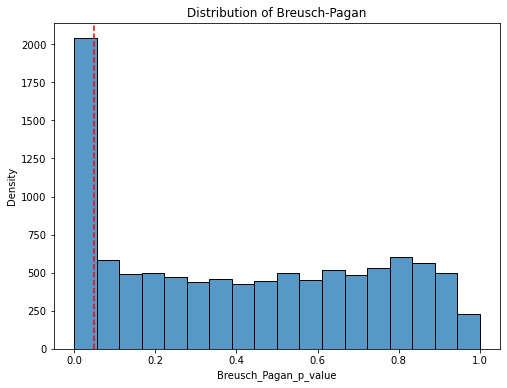

In [57]:
# Create a distribution plot of breusch-pagan test results
plt.figure(figsize=(8, 6))
sns.histplot(results_df['Breusch_Pagan_p_value'])
plt.xlabel('Breusch_Pagan_p_value')
plt.ylabel('Density')
plt.axvline(x=0.05, color='red', linestyle='--')
plt.title('Distribution of Breusch-Pagan')
plt.show()

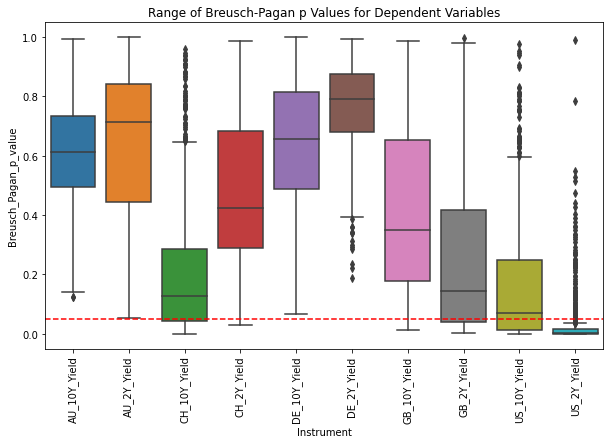

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=results_df['Instrument'], y=results_df['Breusch_Pagan_p_value'])
plt.xlabel('Instrument')
plt.ylabel('Breusch_Pagan_p_value')
plt.title('Range of Breusch-Pagan p Values for Dependent Variables')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.show()

#### Multicollinearity

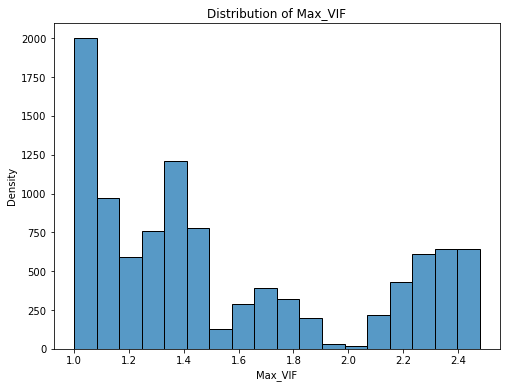

In [59]:
# Create a distribution plot of vif test results
plt.figure(figsize=(8, 6))
sns.histplot(results_df['Max_VIF'])
plt.xlabel('Max_VIF')
plt.ylabel('Density')
plt.title('Distribution of Max_VIF')
plt.show()

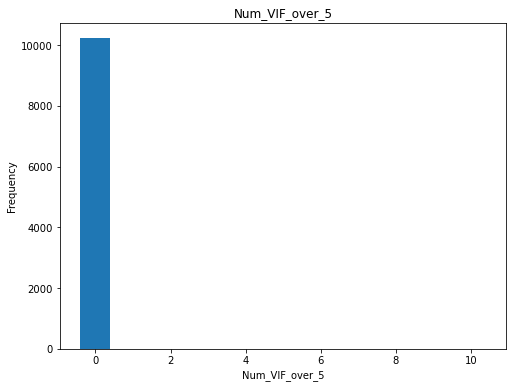

In [60]:
from collections import Counter

# Count the occurrences of each value in Num_VIF_over_5
value_counts = Counter(results_df['Num_VIF_over_5'])

# Create a list of frequencies for values 0 to 10
frequencies = [value_counts[i] for i in range(11)]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(11), frequencies)
plt.xlabel('Num_VIF_over_5')
plt.ylabel('Frequency')
plt.title('Num_VIF_over_5')
plt.show()

#### Normality Test
The Jarque Bera p-value is used to indicate whether the residuals of a regression are normally distributed. we defined an alpha of 0.05, which means that all p-values below this significance level are not normally distributed. We have marked this threshold in our diagrams with a red line.

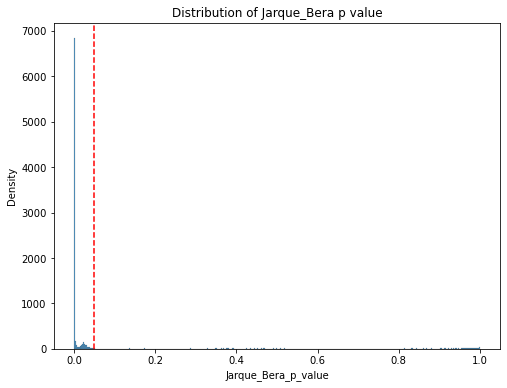

In [61]:
# Create a distribution plot of breusch-pagan test results
plt.figure(figsize=(8, 6))
sns.histplot(results_df['Jarque_Bera_p_value'])
plt.xlabel('Jarque_Bera_p_value')
plt.ylabel('Density')
plt.axvline(x=0.05, color='red', linestyle='--')
plt.title('Distribution of Jarque_Bera p value')
plt.show()

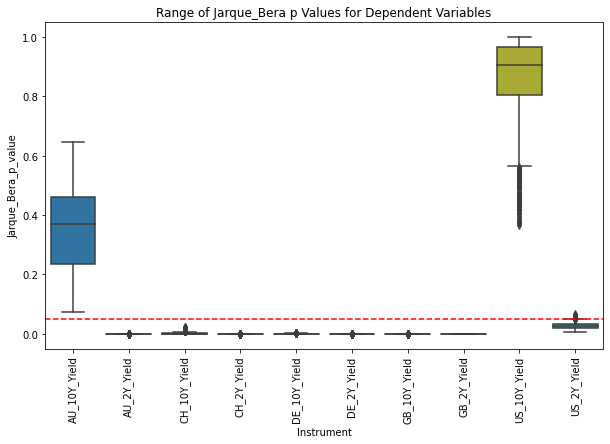

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=results_df['Instrument'], y=results_df['Jarque_Bera_p_value'])
plt.xlabel('Instrument')
plt.ylabel('Jarque_Bera_p_value')
plt.title('Range of Jarque_Bera p Values for Dependent Variables')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.show()

#### Models without Autocorrelation, Heteroskedasticity, Multicolinearity and are normaly distributed
We look for the models with the highest significance and have defined a rule for this. Only the values that meet the following criteria should be displayed:
- Durbin Watson value between 1.5 and 2.5 to exclude all regressions that show autocorrelation
- Jarque-Bera P-Value over 0.05 to exclude all regressions which are not normaly distributed
- Breusch-Pagan p-Value over 0.05 to exclude all regressions that show heteroskedasticity
- No VIF Values over 5 to exclude all regressions which show multicollinearity

In [63]:
# Filter the DataFrame based on desired criteria (e.g., significance levels, Durbin-Watson range, etc.)
filtered_models_df = results_df[
    (results_df['Durbin_Watson'] > 1.5) &
    (results_df['Durbin_Watson'] < 2.5) &
    (results_df['Jarque_Bera_p_value'] > 0.05) &
    (results_df['Breusch_Pagan_p_value'] > 0.05) &
    (results_df['Num_VIF_over_5'] == 0)
]

filtered_models_df = filtered_models_df.sort_values(by='Adj_R_squared', ascending=False)

# Print the filtered models
print("Filtered Models:")
filtered_models_df.head()

Filtered Models:


,Instrument,Indicators,R_squared,Adj_R_squared,F_statistic,Prob_F_statistic,Durbin_Watson,Jarque_Bera,Jarque_Bera_p_value,Lagrange_Multiplier_statistic,Breusch_Pagan_p_value,Max_VIF,Num_VIF_over_5
48,AU_10Y_Yield,"DE_Consumer_Sentiment, GB_Producer Prices",0.063575,0.048828,4.311109,0.015436,1.829692,1.961423,0.375044,0.858118,0.651122,1.016602,0
84,AU_10Y_Yield,"US_Construction_Activity, DE_Consumer_Sentimen...",0.069065,0.046900,3.115916,0.028598,1.822369,2.075811,0.354196,2.023964,0.567448,1.023005,0
170,AU_10Y_Yield,"DE_Consumer_Sentiment, AU_Trade Balance, GB_Pr...",0.068831,0.046660,3.104593,0.029014,1.806783,1.717573,0.423676,3.803359,0.283496,1.071193,0
254,AU_10Y_Yield,"US_Construction_Activity, DE_Consumer_Sentimen...",0.075406,0.045819,2.548628,0.042539,1.798673,2.040849,0.360442,4.465766,0.346626,1.071381,0
158,AU_10Y_Yield,"CH_Retail_Sales, DE_Consumer_Sentiment, GB_Pro...",0.065874,0.043633,2.961833,0.034795,1.808874,1.416677,0.492462,1.023314,0.795611,1.064789,0


In [64]:
# Group the data by 'Instrument' and select the row with the highest adjusted R-squared for each group
filtered_models_table = filtered_models_df.groupby('Instrument').apply(lambda x: x.loc[x['Adj_R_squared'].idxmax()])

# Reset the index of the resulting table
filtered_models_table.reset_index(drop=True, inplace=True)

# Print the resulting table
filtered_models_table


,Instrument,Indicators,R_squared,Adj_R_squared,F_statistic,Prob_F_statistic,Durbin_Watson,Jarque_Bera,Jarque_Bera_p_value,Lagrange_Multiplier_statistic,Breusch_Pagan_p_value,Max_VIF,Num_VIF_over_5
0,AU_10Y_Yield,"DE_Consumer_Sentiment, GB_Producer Prices",0.063575,0.048828,4.311109,0.015436,1.829692,1.961423,0.375044,0.858118,0.651122,1.016602,0
1,US_10Y_Yield,"US_Consumer_Spending, DE_Consumer_Sentiment, A...",0.068076,0.038254,2.282761,0.064098,1.988228,0.020364,0.989870,6.246180,0.181502,1.125286,0


In [65]:
filtered_models_df.count()

Instrument                       1575
Indicators                       1575
R_squared                        1575
Adj_R_squared                    1575
F_statistic                      1575
Prob_F_statistic                 1575
Durbin_Watson                    1575
Jarque_Bera                      1575
Jarque_Bera_p_value              1575
Lagrange_Multiplier_statistic    1575
Breusch_Pagan_p_value            1575
Max_VIF                          1575
Num_VIF_over_5                   1575
dtype: int64

The following diagram shows how many of the 10,230 returns show heteroskedasticity, multicollinarity, autocorrelation and are not normally distributed.

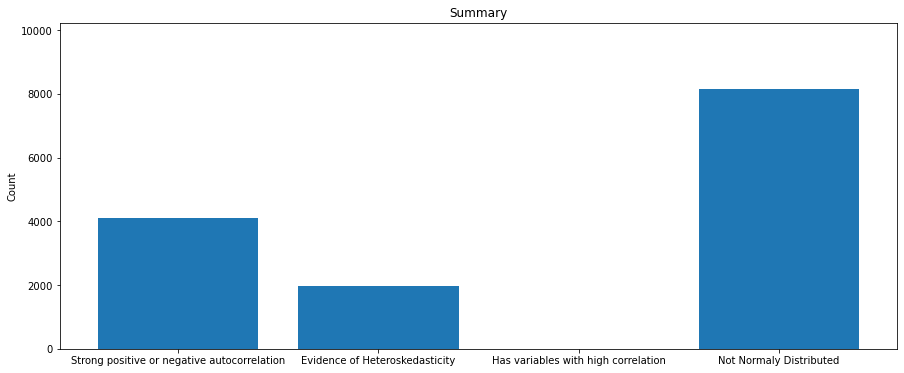

In [66]:
# Define the filtering rules
filter_rules = {
    'Strong positive or negative autocorrelation': (results_df['Durbin_Watson'] <= 1.5) | (results_df['Durbin_Watson'] >= 2.5),
    'Evidence of Heteroskedasticity': results_df['Breusch_Pagan_p_value'] <= 0.05,
    'Has variables with high correlation': results_df['Num_VIF_over_5'] != 0,
    'Not Normaly Distributed': results_df['Jarque_Bera_p_value'] <= 0.05
}

# Calculate the counts for each rule
rule_counts = {}
for rule_name, rule in filter_rules.items():
    rule_counts[rule_name] = len(results_df[rule])

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(range(len(rule_counts)), list(rule_counts.values()), align='center')
plt.xticks(range(len(rule_counts)), list(rule_counts.keys()), rotation=0)
plt.title('Summary')
plt.ylim(0, 10230)
plt.ylabel('Count')
plt.savefig('Charts\Filter Results_'+col[0]+'.png')
plt.show()

End